          temp  feelslike   humidity
Year                                
2013  4.818630   2.156712  66.168219
2014  4.321096   1.949589  65.372877
2015  6.227671   4.285753  60.702740
2016  6.122404   4.125410  61.482514
2017  5.095616   2.701370  59.685205
2018  4.330685   1.937808  61.824110
2019  3.663836   1.237808  64.559452
2020  5.000000   2.501639  61.069399
2021  5.295342   2.854247  57.591781
2022  5.201918   2.560822  57.882740


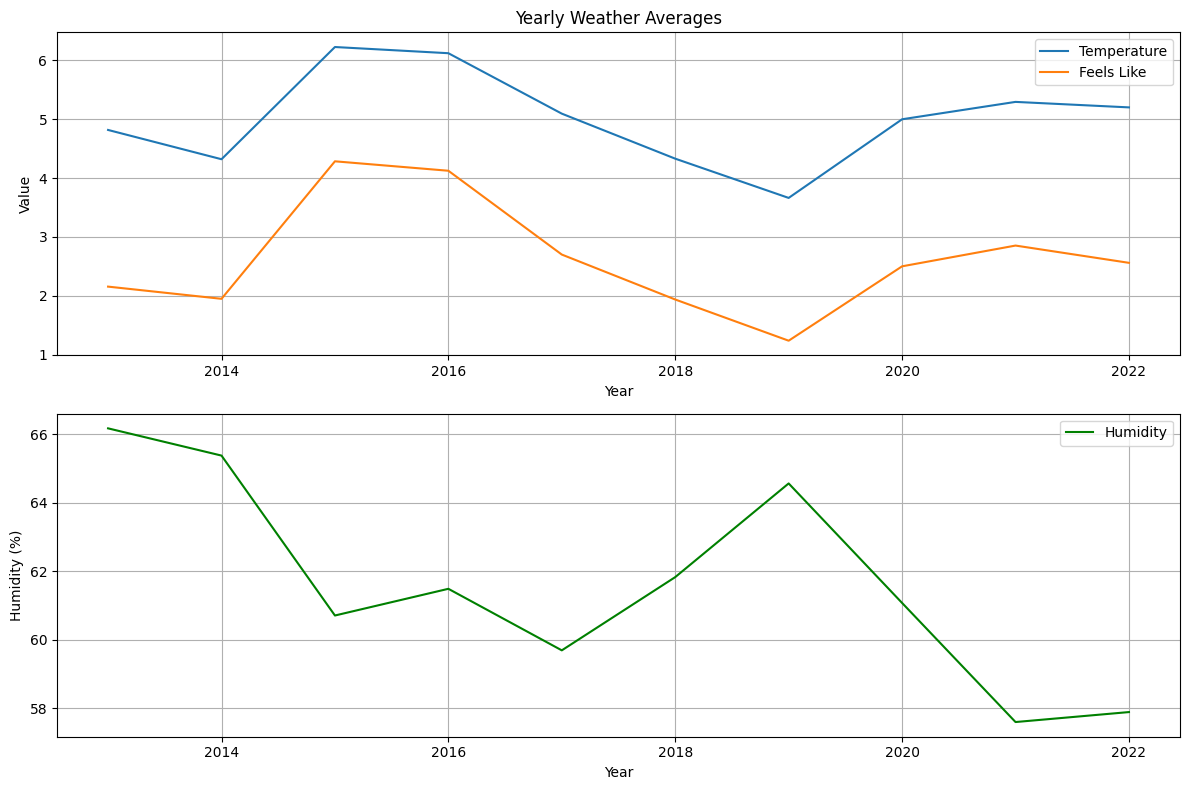

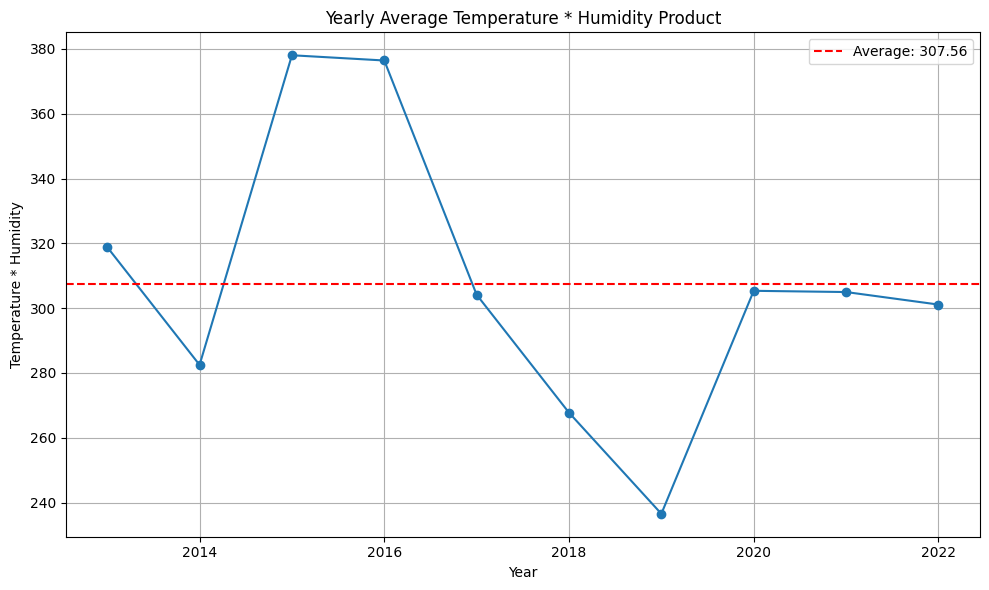

icon
rain                 1786
partly-cloudy-day    1096
snow                  680
clear-day              56
cloudy                 27
wind                    7
Name: count, dtype: int64


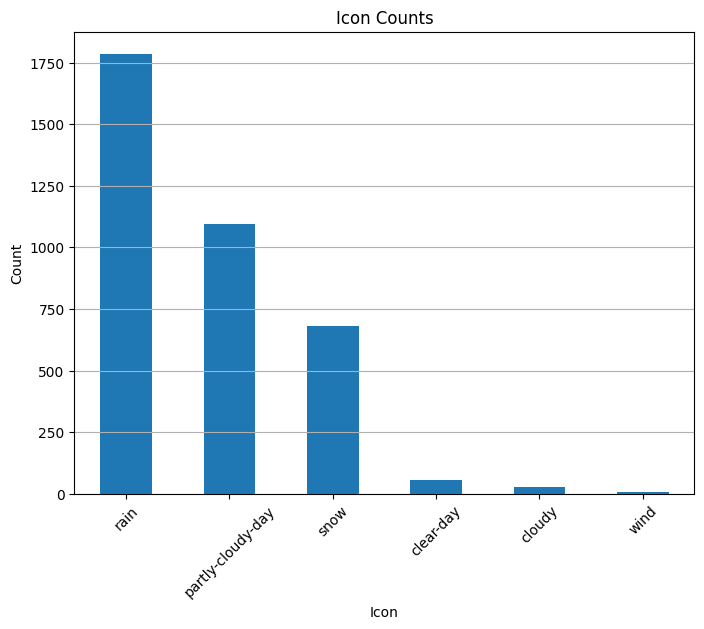

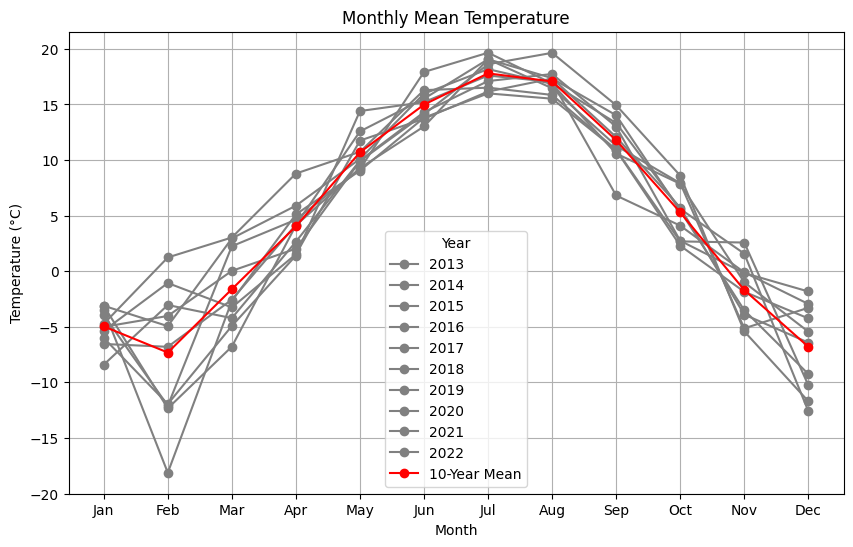

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Path to the Excel file for crop data
crop_file_path = r""

# Path to the CSV file for weather data
weather_file_path = r""

# Read the crop Excel file into a pandas DataFrame
crop_df = pd.read_excel(crop_file_path, index_col=0)

# Convert float values in the second and third rows to strings and concatenate
crop_df.iloc[0] = crop_df.iloc[0].astype(str) + ' ' + crop_df.iloc[1].astype(str).fillna('').astype(str)

# Drop the third row
crop_df = pd.concat([crop_df.iloc[[0]], crop_df.iloc[2:]])

# Delete columns with 'nan nan' in the first row
for col in crop_df.columns:
    if crop_df.loc[crop_df.index[0], col] == 'nan nan':
        crop_df.drop(col, axis=1, inplace=True)

# Rename columns for crop data
for col_index in crop_df.columns:
    if col_index[:7] != "Unnamed":
        column_name = col_index[:4]
        next_row_value = crop_df.loc[crop_df.index[0], col_index]  # Use loc instead of iloc to access row by label
        new_col_index = column_name + ' ' + str(next_row_value)  # Convert next_row_value to string
        crop_df.rename(columns={col_index: new_col_index}, inplace=True)
    else:
        next_row_value = crop_df.loc[crop_df.index[0], col_index]  # Use loc instead of iloc to access row by label
        new_col_index = column_name + ' ' + str(next_row_value)  # Convert next_row_value to string
        crop_df.rename(columns={col_index: new_col_index}, inplace=True)

# Drop the first row (column names)
crop_df = crop_df.drop(crop_df.index[0])

# Extract the row corresponding to "Crop Total"
crop_total_row = crop_df.loc["Crop Total"]

# Extract years from column names
crop_years = [col.split()[0] for col in crop_total_row.index if col.split()[0].isdigit()]

# Initialize lists to store data for Harvested Area, Yield, Production, and Seeded Area
seeded_area_data = []
harvested_area_data = []
yield_data = []
production_data = []

# Extract data for each year for crop data
for year in crop_years:
    seeded_area_data.append(crop_total_row[f"{year} Seeded Area (000 ha)"])
    harvested_area_data.append(crop_total_row[f"{year} Harvested Area (000 ha)"])
    yield_data.append(crop_total_row[f"{year} Yield (t/ha)"])
    production_data.append(crop_total_row[f"{year} Production (000 t)"])

# Plot Seeded Area trend for crop data
plt.figure(figsize=(8, 6))
plt.plot(crop_years, seeded_area_data, marker='o', linestyle='-')
plt.title("Seeded Area (000 ha) for Crop")
plt.xlabel("Year")
plt.ylabel("Seeded Area (000 ha)")
plt.grid(True)
plt.show()

# Plot Harvested Area trend for crop data
plt.figure(figsize=(8, 6))
plt.plot(crop_years, harvested_area_data, marker='o', linestyle='-')
plt.title("Harvested Area (000 ha) for Crop")
plt.xlabel("Year")
plt.ylabel("Harvested Area (000 ha)")
plt.grid(True)
plt.show()

# Plot Production trend for crop data
plt.figure(figsize=(8, 6))
plt.plot(crop_years, production_data, marker='o', linestyle='-')
plt.title("Production (000 t) for Crop")
plt.xlabel("Year")
plt.ylabel("Production (000 t)")
plt.grid(True)
plt.show()

# Convert crop_years to integers
crop_years = [int(year) for year in crop_years]

# Plot Yield trend for crop data
plt.figure(figsize=(8, 6))
plt.plot(crop_years, yield_data, marker='o', linestyle='-', label='Yield')
plt.title("Yield (t/ha) for Crop")
plt.xlabel("Year")
plt.ylabel("Yield (t/ha)")
plt.grid(True)

# Calculate trend line for 10-year data
z = np.polyfit(crop_years, yield_data, 1)
p = np.poly1d(z)
plt.plot(crop_years, p(crop_years), color='red', linestyle='--', label='10-Year Trend')

plt.legend()
plt.show()


# Read the weather CSV file into a pandas DataFrame with "datetime" as the index
weather_df = pd.read_csv(weather_file_path, index_col="datetime")

# Drop the first column
weather_df = weather_df.drop(columns=weather_df.columns[0])

# Create a new DataFrame with selected columns for weather data
weather_new_df = weather_df[["temp", "feelslike", "humidity"]].copy()

# Convert the index to datetime if it's not already for weather data
weather_new_df.index = pd.to_datetime(weather_new_df.index)

# Group by year and calculate the mean for weather data
yearly_avg_weather_df = weather_new_df.groupby(weather_new_df.index.year).mean()

# Rename the index to 'Year' for weather data
yearly_avg_weather_df.index.name = 'Year'

# Display the new DataFrame for weather data
print(yearly_avg_weather_df)

# Plot yearly averages for weather data
plt.figure(figsize=(12, 8))

# Plot temperature and feels like for weather data
plt.subplot(2, 1, 1)
plt.plot(yearly_avg_weather_df.index, yearly_avg_weather_df['temp'], label='Temperature')
plt.plot(yearly_avg_weather_df.index, yearly_avg_weather_df['feelslike'], label='Feels Like')
plt.title('Yearly Weather Averages')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Plot humidity for weather data
plt.subplot(2, 1, 2)
plt.plot(yearly_avg_weather_df.index, yearly_avg_weather_df['humidity'], label='Humidity', color='green')
plt.xlabel('Year')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

# Calculate the product of temperature and humidity for each year for weather data
yearly_avg_weather_df['temp_humidity_product'] = yearly_avg_weather_df['temp'] * yearly_avg_weather_df['humidity']

# Plot the relationship between temperature and humidity for weather data
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_weather_df.index, yearly_avg_weather_df['temp_humidity_product'], marker='o', linestyle='-')
plt.title('Yearly Average Temperature * Humidity Product for Weather')
plt.xlabel('Year')
plt.ylabel('Temperature * Humidity')
plt.grid(True)

# Calculate the average of temp_humidity_product for weather data
average_temp_humidity_product = yearly_avg_weather_df['temp_humidity_product'].mean()

# Add a horizontal line at the average value for weather data
plt.axhline(y=average_temp_humidity_product, color='r', linestyle='--', label=f'Average: {average_temp_humidity_product:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Count the number of occurrences of each value in the "icon" column for weather data
icon_counts = weather_df['icon'].value_counts()

# Display the counts for weather data
print(icon_counts)

# Plot icon counts for weather data
plt.figure(figsize=(8, 6))
icon_counts.plot(kind='bar')
plt.title('Icon Counts for Weather')
plt.xlabel('Icon')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Extract the "temp" column for weather data
temp_series = weather_df["temp"]

# Convert the index to datetime if it's not already for weather data
temp_series.index = pd.to_datetime(temp_series.index)

# Group by month and year, then calculate the mean temperature for weather data
monthly_mean_temp = temp_series.groupby([temp_series.index.month, temp_series.index.year]).mean()

# Unstack the multi-index to have years as columns and months as rows for weather data
monthly_mean_temp = monthly_mean_temp.unstack()

# Calculate the mean temperature across all years for each month for weather data
mean_temp_across_years = monthly_mean_temp.mean(axis=1)

# Create a figure and axis object for weather data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the monthly mean temperatures for weather data
monthly_mean_temp.plot(ax=ax, marker='o', linestyle='-', color='grey')  # Set color to blue for yearly averages
mean_temp_across_years.plot(ax=ax, marker='o', linestyle='-', color='red', label='10-Year Mean')  # Set color to red for the 10-year mean

# Customize the plot for weather data
ax.set_title('Monthly Mean Temperature for Weather')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (°C)')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.grid(True)
ax.legend(title='Year')

# Show the plot for weather data
plt.show()